# Computer Vision and Convolutional Neural Networks

Aim - To do food image classification using Computer vision and Convolutional neural networks

data - https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/

To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [3]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

zip_ref = zipfile.ZipFile("pizza_steak.zip",'r')
zip_ref.extractall()
zip_ref.close()




--2023-03-05 14:18:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  30.6MB/s    in 4.2s    

2023-03-05 14:18:09 (24.7 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the Data

In [4]:
!ls pizza_steak


test  train


In [5]:
!ls pizza_steak/train

pizza  steak


In [6]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}')

There are 2 directories and 0 images in pizza_steak
There are 2 directories and 0 images in pizza_steak/train
There are 0 directories and 750 images in pizza_steak/train/pizza
There are 0 directories and 750 images in pizza_steak/train/steak
There are 2 directories and 0 images in pizza_steak/test
There are 0 directories and 250 images in pizza_steak/test/pizza
There are 0 directories and 250 images in pizza_steak/test/steak


In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))
print(num_steak_images_train)

750


In [8]:
num_pizza_images_train = len(os.listdir('pizza_steak/train/pizza'))
print(num_pizza_images_train)

750


In [9]:
#getting class names
import pathlib

data_dir = pathlib.Path('pizza_steak/train/')
class_names =  np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [10]:
def view_random_image(target_dir, target_class):
  """
  views random image from the class
  """
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image Shape: {img.shape}')
  return img

Image Shape: (288, 512, 3)


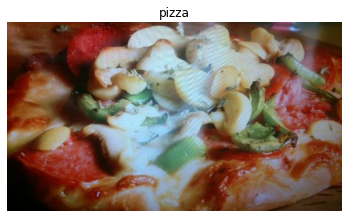

In [11]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

Image Shape: (384, 512, 3)


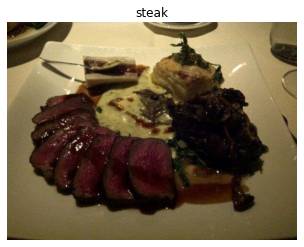

In [12]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='steak')

In [13]:
img.shape

(384, 512, 3)

In [14]:
tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[ 79,  48,  30],
        [ 53,  22,   4],
        [ 60,  29,   9],
        ...,
        [104,  89,  48],
        [107,  92,  51],
        [108,  93,  52]],

       [[ 58,  27,   9],
        [ 65,  34,  16],
        [ 74,  43,  23],
        ...,
        [103,  88,  47],
        [104,  89,  48],
        [105,  90,  49]],

       [[ 47,  16,   0],
        [ 70,  39,  21],
        [ 65,  34,  14],
        ...,
        [106,  91,  50],
        [105,  90,  49],
        [105,  90,  49]],

       ...,

       [[ 25,  11,   2],
        [ 25,  11,   2],
        [ 25,  11,   2],
        ...,
        [  9,   9,   0],
        [  9,   9,   0],
        [  8,   8,   0]],

       [[ 23,  10,   2],
        [ 22,   9,   1],
        [ 21,   8,   0],
        ...,
        [  7,   9,   0],
        [  7,   8,   0],
        [  7,   8,   0]],

       [[ 19,   6,   0],
        [ 18,   5,   0],
        [ 17,   4,   0],
        ...,
        [  4,   5,   

## Model Building

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(123)

train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 123)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 123)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [16]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 10,
                           kernel_size = 3,
                           activation = 'relu',
                           input_shape = (224,224,3)),
    tf.keras.layers.Conv2D(10,3,activation = 'relu'),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

model_1.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_1 = model_1.fit(train_data,
                            epochs=5,
                            steps_per_epoch=len(train_data),
                            validation_data=valid_data,
                            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 22s 232ms/step - loss: 0.5678 - accuracy: 0.7093 - val_loss: 0.4299 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 11s 230ms/step - loss: 0.4496 - accuracy: 0.8020 - val_loss: 0.3993 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 10s 216ms/step - loss: 0.4322 - accuracy: 0.8120 - val_loss: 0.3611 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.4068 - accuracy: 0.8273 - val_loss: 0.3526 - val_accuracy: 0.8660
Epoch 5/5
47/47 [==============================] - 9s 200ms/step - loss: 0.3561 - accuracy: 0.8560 - val_loss: 0.3994 - val_accuracy: 0.8380


In [18]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

### Non CNN model

In [23]:
tf.random.set_seed(123)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 224ms/step - loss: 0.7496 - accuracy: 0.5053 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 10s 206ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 12s 260ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 16s 336ms/step - loss: 0.6932 - accuracy: 0.4880 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 17s 359ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [24]:
model_2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 150528)            0         
                                                                 
 dense_7 (Dense)             (None, 4)                 602116    
                                                                 
 dense_8 (Dense)             (None, 4)                 20        
                                                                 
 dense_9 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [28]:
tf.random.set_seed(123)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    #tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 187ms/step - loss: 3.1688 - accuracy: 0.6080 - val_loss: 1.2774 - val_accuracy: 0.5360
Epoch 2/5
47/47 [==============================] - 9s 202ms/step - loss: 0.7824 - accuracy: 0.6960 - val_loss: 0.5626 - val_accuracy: 0.7460
Epoch 3/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6502 - accuracy: 0.7347 - val_loss: 1.5034 - val_accuracy: 0.5800
Epoch 4/5
47/47 [==============================] - 9s 202ms/step - loss: 0.9161 - accuracy: 0.7047 - val_loss: 0.5183 - val_accuracy: 0.7540
Epoch 5/5
47/47 [==============================] - 9s 187ms/step - loss: 0.5008 - accuracy: 0.7873 - val_loss: 0.4808 - val_accuracy: 0.7640


In [30]:
model_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 150528)            0         
                                                                 
 dense_20 (Dense)            (None, 100)               15052900  
                                                                 
 dense_21 (Dense)            (None, 100)               10100     
                                                                 
 dense_22 (Dense)            (None, 100)               10100     
                                                                 
 dense_23 (Dense)            (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [29]:
!nvidia-smi

Sun Mar  5 08:30:32 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    29W /  70W |   2359MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## 1 - Data Exploration

Image Shape: (384, 512, 3)
Image Shape: (512, 512, 3)


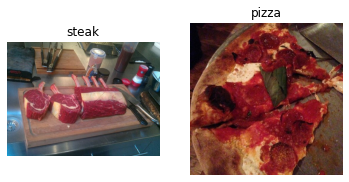

In [16]:
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/","steak")
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/","pizza")

## 2.Preprocess the Data

In [17]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255.)
test_datagen = ImageDataGenerator(rescale=1./255.)

In [19]:
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [20]:
images,labels = train_data.next()
len(images), len(labels)

(32, 32)

In [21]:
images[0].shape

(224, 224, 3)

In [22]:
labels

array([1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.],
      dtype=float32)

## 3.Model - Baseline

In [23]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam

In [53]:
model_4 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding='valid',
          activation='relu',
          input_shape=(224,224,3)),
    Conv2D(10, 3, activation='relu'),
    Conv2D(10, 3, activation='relu'),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 12s 220ms/step - loss: 0.9559 - accuracy: 0.6860 - val_loss: 0.4213 - val_accuracy: 0.8120
Epoch 2/5
47/47 [==============================] - 10s 209ms/step - loss: 0.4354 - accuracy: 0.8107 - val_loss: 0.3970 - val_accuracy: 0.8400
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3468 - accuracy: 0.8547 - val_loss: 0.3662 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 10s 222ms/step - loss: 0.2255 - accuracy: 0.9173 - val_loss: 0.4532 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 10s 224ms/step - loss: 0.1005 - accuracy: 0.9660 - val_loss: 0.5109 - val_accuracy: 0.7820


In [54]:
## 4.Evaluate the Model

In [24]:
pd.DataFrame(history_4.history).plot(figsize=(16,10))

NameError: ignored

In [25]:
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """

  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="testing_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

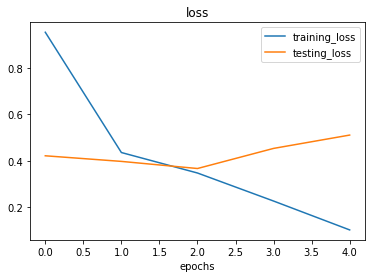

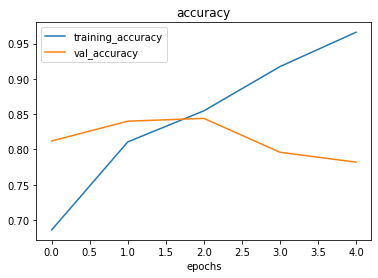

In [65]:
plot_loss_curves(history_4)

## 6. Tuning Model Parameters

In [68]:
# Create the model
tf.random.set_seed(123)

model_5 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [69]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


In [73]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 11s 230ms/step - loss: 0.3862 - accuracy: 0.8253 - val_loss: 0.3180 - val_accuracy: 0.8780
Epoch 2/5
47/47 [==============================] - 10s 211ms/step - loss: 0.3505 - accuracy: 0.8593 - val_loss: 0.3017 - val_accuracy: 0.8880
Epoch 3/5
47/47 [==============================] - 10s 209ms/step - loss: 0.3257 - accuracy: 0.8673 - val_loss: 0.3257 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 10s 207ms/step - loss: 0.3310 - accuracy: 0.8653 - val_loss: 0.2877 - val_accuracy: 0.8900
Epoch 5/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3055 - accuracy: 0.8767 - val_loss: 0.2802 - val_accuracy: 0.8880


In [74]:
model_5.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_31 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_32 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 26, 26, 10)     

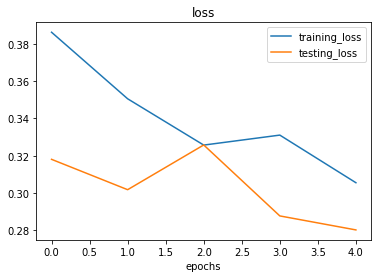

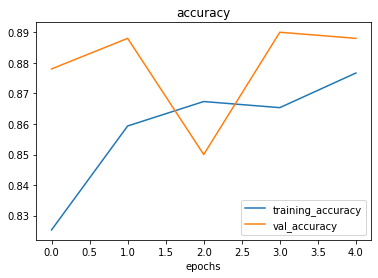

In [76]:
plot_loss_curves(history_5)

In [26]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1./255.,
                                             rotation_range=20,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [27]:
train_data_augmented =train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224,224),
                                                                  batch_size=32,
                                                                  class_mode='binary',
                                                                  shuffle=False)

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False)

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [28]:
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

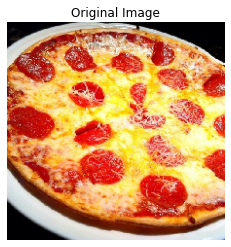

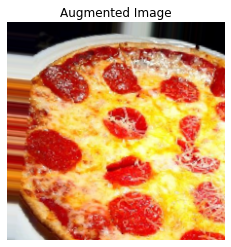

In [29]:
random_number = random.randint(0,32)

plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)

plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [88]:
#Create the model for augmented training dataset
tf.random.set_seed(123)

model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')

])

In [89]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [91]:
# Fit the model with augmented training dataset
history_6 = model_6.fit(train_data_augmented,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 25s 499ms/step - loss: 0.7834 - accuracy: 0.4247 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 24s 505ms/step - loss: 0.6931 - accuracy: 0.4753 - val_loss: 0.6927 - val_accuracy: 0.4860
Epoch 3/5
47/47 [==============================] - 24s 522ms/step - loss: 0.6929 - accuracy: 0.4887 - val_loss: 0.6921 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 27s 578ms/step - loss: 0.6924 - accuracy: 0.4947 - val_loss: 0.6902 - val_accuracy: 0.5080
Epoch 5/5
47/47 [==============================] - 24s 517ms/step - loss: 0.6935 - accuracy: 0.5000 - val_loss: 0.6775 - val_accuracy: 0.5020


In [92]:
model_6.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_34 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_35 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 26, 26, 10)     

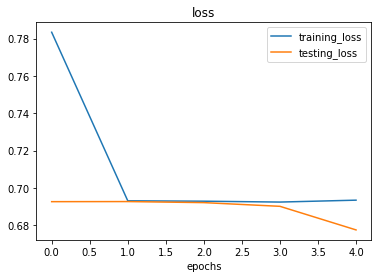

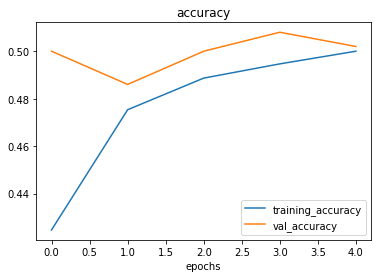

In [94]:
plot_loss_curves(history_6)

#### Augmented Shuffled Training Dataset

In [30]:
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224,224),
                                                                            batch_size=32,
                                                                            class_mode='binary',
                                                                            shuffle=True)

Found 1500 images belonging to 2 classes.


In [31]:
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

history_7 = model_7.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 88s 2s/step - loss: 0.6517 - accuracy: 0.6060 - val_loss: 0.5098 - val_accuracy: 0.8000
Epoch 2/5
47/47 [==============================] - 83s 2s/step - loss: 0.5102 - accuracy: 0.7567 - val_loss: 0.3947 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 85s 2s/step - loss: 0.4763 - accuracy: 0.7760 - val_loss: 0.3712 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 85s 2s/step - loss: 0.4515 - accuracy: 0.7973 - val_loss: 0.3150 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 84s 2s/step - loss: 0.4564 - accuracy: 0.8020 - val_loss: 0.3211 - val_accuracy: 0.8720


In [32]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 10)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

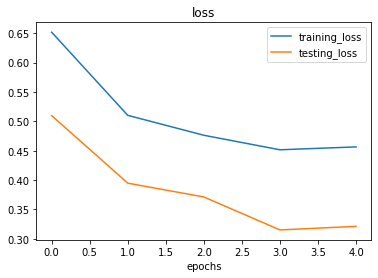

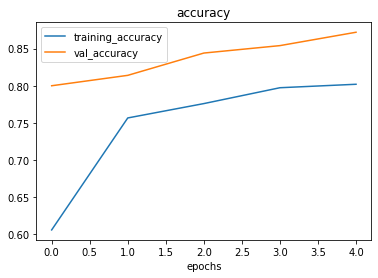

In [34]:
plot_loss_curves(history_7)

In [103]:
model_8 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 35s 697ms/step - loss: 0.6360 - accuracy: 0.6327 - val_loss: 0.4990 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 24s 515ms/step - loss: 0.5399 - accuracy: 0.7327 - val_loss: 0.3957 - val_accuracy: 0.8060
Epoch 3/5
47/47 [==============================] - 25s 538ms/step - loss: 0.5067 - accuracy: 0.7653 - val_loss: 0.3736 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 25s 524ms/step - loss: 0.5028 - accuracy: 0.7613 - val_loss: 0.4652 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 24s 521ms/step - loss: 0.4719 - accuracy: 0.7867 - val_loss: 0.3394 - val_accuracy: 0.8760


In [104]:
model_8.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 111, 111, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 109, 109, 10)      2890      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 26, 26, 10)     

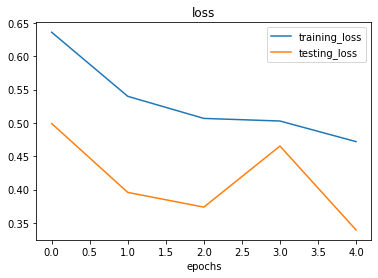

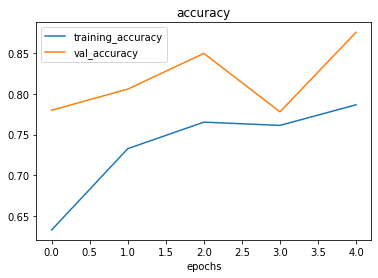

In [105]:
plot_loss_curves(history_8)

In [107]:
model_9 = Sequential([
    Conv2D(32, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(16,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_9.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 500ms/step - loss: 0.6550 - accuracy: 0.6013 - val_loss: 0.5400 - val_accuracy: 0.7240
Epoch 2/5
47/47 [==============================] - 24s 509ms/step - loss: 0.5143 - accuracy: 0.7540 - val_loss: 0.4526 - val_accuracy: 0.7800
Epoch 3/5
47/47 [==============================] - 24s 511ms/step - loss: 0.4783 - accuracy: 0.7773 - val_loss: 0.3410 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 24s 520ms/step - loss: 0.4595 - accuracy: 0.7860 - val_loss: 0.3383 - val_accuracy: 0.8520
Epoch 5/5
47/47 [==============================] - 25s 538ms/step - loss: 0.4611 - accuracy: 0.7807 - val_loss: 0.3163 - val_accuracy: 0.8560


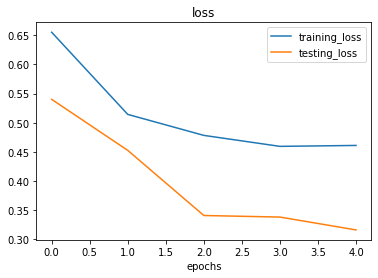

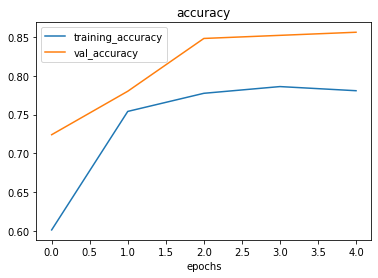

In [109]:
plot_loss_curves(history_9)

In [112]:
model_10 = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(16,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_10.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

history_10 = model_10.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 27s 529ms/step - loss: 0.6397 - accuracy: 0.6247 - val_loss: 0.4895 - val_accuracy: 0.7620
Epoch 2/10
47/47 [==============================] - 28s 588ms/step - loss: 0.5407 - accuracy: 0.7287 - val_loss: 0.4613 - val_accuracy: 0.7860
Epoch 3/10
47/47 [==============================] - 25s 533ms/step - loss: 0.5027 - accuracy: 0.7713 - val_loss: 0.4162 - val_accuracy: 0.7920
Epoch 4/10
47/47 [==============================] - 26s 553ms/step - loss: 0.4813 - accuracy: 0.7813 - val_loss: 0.3528 - val_accuracy: 0.8600
Epoch 5/10
47/47 [==============================] - 25s 529ms/step - loss: 0.4684 - accuracy: 0.7920 - val_loss: 0.3539 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 25s 528ms/step - loss: 0.4804 - accuracy: 0.7853 - val_loss: 0.3443 - val_accuracy: 0.8740
Epoch 7/10
47/47 [==============================] - 25s 528ms/step - loss: 0.4545 - accuracy: 0.8027 - val_loss: 0.2885 - val_accuracy: 0.8860

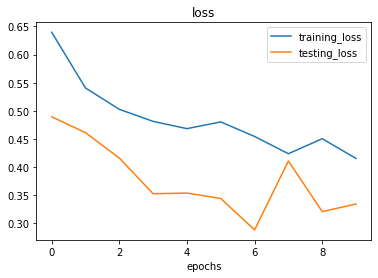

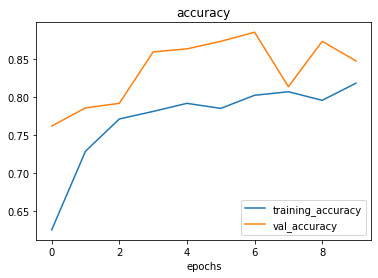

In [113]:
plot_loss_curves(history_10)

In [118]:
model_11 = Sequential([
    Conv2D(64, 3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(16,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(10,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1, activation='sigmoid')
])

model_11.compile(loss="binary_crossentropy",
                optimizer=Adam(learning_rate=0.001),
                metrics=["accuracy"])

history_11 = model_11.fit(train_data_augmented_shuffled,
                        epochs=10,
                        steps_per_epoch=len(train_data_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 29s 581ms/step - loss: 0.6652 - accuracy: 0.5900 - val_loss: 0.4877 - val_accuracy: 0.8000
Epoch 2/10
47/47 [==============================] - 25s 523ms/step - loss: 0.5384 - accuracy: 0.7453 - val_loss: 0.4040 - val_accuracy: 0.8180
Epoch 3/10
47/47 [==============================] - 24s 520ms/step - loss: 0.4958 - accuracy: 0.7680 - val_loss: 0.3913 - val_accuracy: 0.8400
Epoch 4/10
47/47 [==============================] - 24s 520ms/step - loss: 0.5030 - accuracy: 0.7720 - val_loss: 0.4052 - val_accuracy: 0.8300
Epoch 5/10
47/47 [==============================] - 25s 523ms/step - loss: 0.4856 - accuracy: 0.7733 - val_loss: 0.3724 - val_accuracy: 0.8260
Epoch 6/10
47/47 [==============================] - 24s 518ms/step - loss: 0.4943 - accuracy: 0.7773 - val_loss: 0.3720 - val_accuracy: 0.8580
Epoch 7/10
47/47 [==============================] - 24s 520ms/step - loss: 0.4806 - accuracy: 0.7787 - val_loss: 0.3720 - val_accuracy: 0.8500

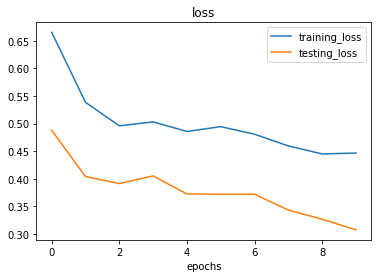

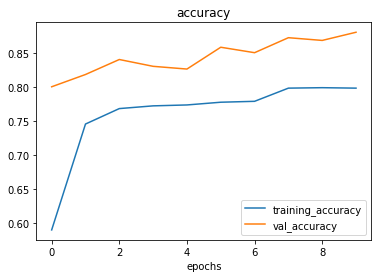

In [119]:
plot_loss_curves(history_11)

In [120]:
model_1.evaluate(test_data)
model_2.evaluate(test_data)
model_3.evaluate(test_data)
model_4.evaluate(test_data)
model_5.evaluate(test_data)
model_6.evaluate(test_data)
model_7.evaluate(test_data)
model_8.evaluate(test_data)
model_9.evaluate(test_data)
model_10.evaluate(test_data)
model_11.evaluate(test_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.3073 - accuracy: 0.8800


[0.3073423206806183, 0.8799999952316284]

### Making a Prediction

In [35]:
print(class_names)

['pizza' 'steak']


--2023-03-05 14:30:56--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.2’

03-steak.jpeg.2     100%[===================>]   1.89M  --.-KB/s    in 0.07s   

2023-03-05 14:30:56 (26.0 MB/s) - ‘03-steak.jpeg.2’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

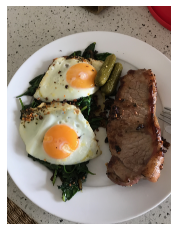

In [38]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg 
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)

In [39]:
steak.shape

(4032, 3024, 3)

In [40]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads and image from filename, turns it into a tensor 
  and reshapes it to(img_shape, img_shape, colour_channel).
  """

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size=[img_shape,img_shape])

  img = img/255.
  return img

In [41]:
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [42]:
model_7.predict(steak)

ValueError: ignored

In [43]:
print(f"Shape before new dimension : {steak.shape}")
steak = tf.expand_dims(steak, axis=0)
print(f"Shape after new dimension : {steak.shape}")
steak

Shape before new dimension : (224, 224, 3)
Shape after new dimension : (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.6377451 , 0.6220588 , 0.57892156],
         [0.6504902 , 0.63186276, 0.5897059 ],
         [0.63186276, 0.60833335, 0.5612745 ],
         ...,
         [0.52156866, 0.05098039, 0.09019608],
         [0.49509802, 0.04215686, 0.07058824],
         [0.52843136, 0.07745098, 0.10490196]],

        [[0.6617647 , 0.6460784 , 0.6107843 ],
         [0.6387255 , 0.6230392 , 0.57598037],
         [0.65588236, 0.63235295, 0.5852941 ],
         ...,
         [0.5352941 , 0.06862745, 0.09215686],
         [0.529902  , 0.05931373, 0.09460784],
         [0.5142157 , 0.05539216, 0.08676471]],

        [[0.6519608 , 0.6362745 , 0.5892157 ],
         [0.6392157 , 0.6137255 , 0.56764704],
         [0.65637255, 0.6269608 , 0.5828431 ],
         ...,
         [0.53137255, 0.06470589, 0.08039216],
         [0.527451  , 0.06862745, 0.1       ],
         [0.52254903, 0.05196078, 0.0872549 ]],

        ...,

        [[0.49313724, 0.42745098, 

In [57]:
pred= model_7.predict(steak)
pred

1/1 [==============================] - 0s 38ms/step


array([[0.9278524]], dtype=float32)

In [46]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'steak'

In [55]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at the filename, makes a prediction with the trained model
  and plots the image with the predicted class
  """
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img,axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"prediction : {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 43ms/step


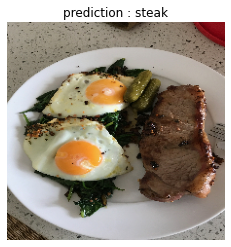

In [56]:
pred_and_plot(model_7, "03-steak.jpeg", class_names)

## Multi Class Classification

In [58]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()
     

--2023-03-05 15:17:50--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.189.128, 108.177.97.128, 108.177.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.189.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  30.0MB/s    in 17s     

2023-03-05 15:18:07 (28.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



## Preprocess the Data

In [59]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.

In [60]:

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [61]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)
     

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image Shape: (512, 512, 3)


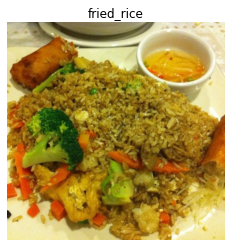

In [62]:
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Baseline Model

In [66]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_12 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_12.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
     

In [67]:
history_12 = model_12.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 669s 3s/step - loss: 2.1808 - accuracy: 0.1953 - val_loss: 2.0321 - val_accuracy: 0.2876
Epoch 2/5
235/235 [==============================] - 715s 3s/step - loss: 1.9706 - accuracy: 0.3040 - val_loss: 1.9470 - val_accuracy: 0.2956
Epoch 3/5
235/235 [==============================] - 653s 3s/step - loss: 1.8169 - accuracy: 0.3793 - val_loss: 1.9511 - val_accuracy: 0.2948
Epoch 4/5
 24/235 [==>...........................] - ETA: 8:12 - loss: 1.5453 - accuracy: 0.5000

KeyboardInterrupt: ignored

In [68]:
model_12.evaluate(test_data)

11/79 [===>..........................] - ETA: 1:14 - loss: 1.9019 - accuracy: 0.2926

KeyboardInterrupt: ignored

In [ ]:
plot_loss_curves(history_12)

In [71]:

# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  shuffle=True)
     

Found 7500 images belonging to 10 classes.


In [72]:
model_13 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

# Compile the cloned model (same setup as used for model_10)
model_13.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_13 = model_13.fit(train_data_augmented, # use augmented data
                          epochs=10,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
235/235 [==============================] - 434s 2s/step - loss: 2.1664 - accuracy: 0.2151 - val_loss: 2.0459 - val_accuracy: 0.2660
Epoch 2/10
235/235 [==============================] - 385s 2s/step - loss: 2.0414 - accuracy: 0.2796 - val_loss: 1.8984 - val_accuracy: 0.3344
Epoch 3/10
235/235 [==============================] - 385s 2s/step - loss: 1.9990 - accuracy: 0.2993 - val_loss: 1.8881 - val_accuracy: 0.3292
Epoch 4/10
235/235 [==============================] - 435s 2s/step - loss: 1.9469 - accuracy: 0.3256 - val_loss: 1.7802 - val_accuracy: 0.3940
Epoch 5/10
235/235 [==============================] - 387s 2s/step - loss: 1.9368 - accuracy: 0.3288 - val_loss: 1.7570 - val_accuracy: 0.3980
Epoch 6/10
235/235 [==============================] - 385s 2s/step - loss: 1.9076 - accuracy: 0.3391 - val_loss: 1.9334 - val_accuracy: 0.3428
Epoch 7/10
235/235 [==============================] - 386s 2s/step - loss: 1.8886 - accuracy: 0.3535 - val_loss: 1.7283 - val_accuracy: 0.4080

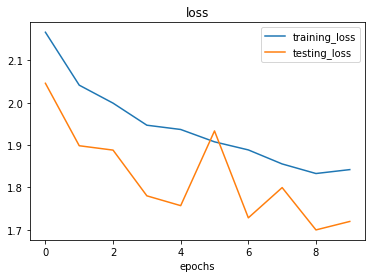

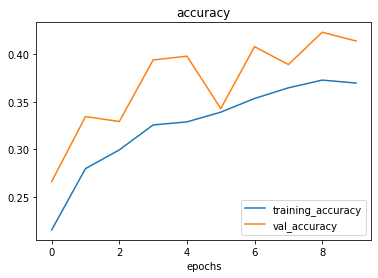

In [73]:
plot_loss_curves(history_13)

In [74]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [75]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

1/1 [==============================] - 0s 96ms/step


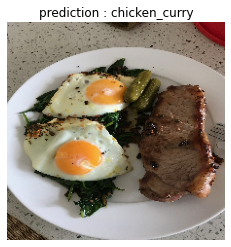

In [76]:
pred_and_plot(model=model_13, 
              filename="03-steak.jpeg", 
              class_names=class_names)

1/1 [==============================] - 0s 35ms/step


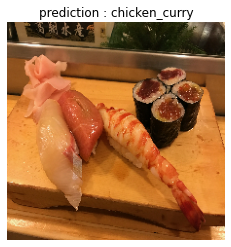

In [77]:
pred_and_plot(model_13, "03-sushi.jpeg", class_names)

1/1 [==============================] - 0s 34ms/step


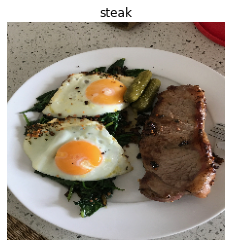

In [78]:
img = load_and_prep_image("03-steak.jpeg")

# Make a prediction
pred = model_13.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [79]:
pred = model_13.predict(tf.expand_dims(img, axis=0))
pred
     

1/1 [==============================] - 0s 33ms/step


array([[0.06800957, 0.05290943, 0.01405968, 0.14746116, 0.09853492,
        0.07737231, 0.04000264, 0.12934566, 0.26406777, 0.10823682]],
      dtype=float32)

In [80]:
class_names[pred.argmax()]

'steak'

In [81]:

# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 34ms/step


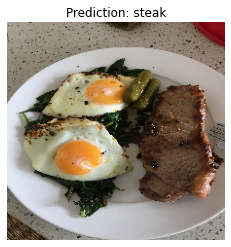

In [82]:
pred_and_plot(model_13, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 33ms/step


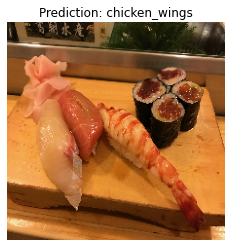

In [83]:

pred_and_plot(model_13, "03-sushi.jpeg", class_names)

In [84]:
model_13.save("saved_trained_model")

In [85]:
loaded_model_13 = tf.keras.models.load_model("saved_trained_model")
loaded_model_13.evaluate(test_data)

79/79 [==============================] - 43s 532ms/step - loss: 1.7197 - accuracy: 0.4140


[1.7197295427322388, 0.414000004529953]